In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("dataset/GlobalLandTemperaturesByMajorCity.csv", parse_dates=["dt"])
data.head()

dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0 1849-01-01              26.704                          1.435  Abidjan   
1 1849-02-01              27.434                          1.362  Abidjan   
2 1849-03-01              28.101                          1.612  Abidjan   
3 1849-04-01              26.140                          1.387  Abidjan   
4 1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             239177 non-null  datetime64[ns]
 1   AverageTemperature             228175 non-null  float64       
 2   AverageTemperatureUncertainty  228175 non-null  float64       
 3   City                           239177 non-null  object        
 4   Country                        239177 non-null  object        
 5   Latitude                       239177 non-null  object        
 6   Longitude                      239177 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 12.8+ MB


In [5]:
data.describe()

AverageTemperature  AverageTemperatureUncertainty
count       228175.000000                  228175.000000
mean            18.125969                       0.969343
std             10.024800                       0.979644
min            -26.772000                       0.040000
25%             12.710000                       0.340000
50%             20.428000                       0.592000
75%             25.918000                       1.320000
max             38.283000                      14.037000

In [6]:
#data.to_pickle("data.pickle")
#data.to_parquet("data.parquet")

In [7]:
data.shape

(239177, 7)

In [8]:
data.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [9]:
data.isna().sum() / data.shape[0] * 100 #verilerin yüzde üzerinden kayıpları

dt                               0.000000
AverageTemperature               4.599941
AverageTemperatureUncertainty    4.599941
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [12]:
data.head()

dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0 1849-01-01              26.704                          1.435  Abidjan   
1 1849-02-01              27.434                          1.362  Abidjan   
2 1849-03-01              28.101                          1.612  Abidjan   
3 1849-04-01              26.140                          1.387  Abidjan   
4 1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W

In [13]:
data[["City", "Country"]]

City        Country
0       Abidjan  Côte D'Ivoire
1       Abidjan  Côte D'Ivoire
2       Abidjan  Côte D'Ivoire
3       Abidjan  Côte D'Ivoire
4       Abidjan  Côte D'Ivoire
...         ...            ...
239171     Xian          China
239172     Xian          China
239173     Xian          China
239174     Xian          China
239175     Xian          China

[228175 rows x 2 columns]

In [14]:
data["Country"].value_counts() #.shape total değer sayısı

China                                 34952
India                                 34627
Brazil                                12139
Turkey                                 9239
United States                          8237
Egypt                                  7550
Pakistan                               6490
Russia                                 6332
Canada                                 6282
Nigeria                                5200
Australia                              4138
Japan                                  4050
Colombia                               4003
Saudi Arabia                           3856
Indonesia                              3758
South Africa                           3746
Ukraine                                3166
Italy                                  3166
United Kingdom                         3166
Germany                                3166
Spain                                  3166
France                                 3166
Morocco                         

In [15]:
data[(data["Country"]=="Turkey") | (data["Country"]=="Brazil")]

dt  AverageTemperature  AverageTemperatureUncertainty  \
11893  1755-01-01              -3.657                          4.084   
11894  1755-02-01              -2.453                          3.712   
11895  1755-03-01               4.458                          3.421   
11898  1755-06-01              21.018                          2.593   
11899  1755-07-01              22.099                          1.963   
...           ...                 ...                            ...   
198855 2013-04-01              26.651                          0.202   
198856 2013-05-01              25.757                          0.548   
198857 2013-06-01              25.007                          0.936   
198858 2013-07-01              24.419                          0.555   
198859 2013-08-01              23.928                          0.805   

            City Country Latitude Longitude  
11893     Ankara  Turkey   39.38N    33.29E  
11894     Ankara  Turkey   39.38N    33.29E  
11895     Ankara  Turkey   39.38N    33.29E  
11898     Ankara  Turkey   39.38N    33.29E  
11899     Ankara  Turkey   39.38N    33.29E  
...          ...     ...      ...       ...  
198855  Salvador  Brazil   13.66S    38.81W  
198856  Salvador  Brazil   13.66S    38.81W  
198857  Salvador  Brazil   13.66S    38.81W  
198858  Salvador  Brazil   13.66S    38.81W  
198859  Salvador  Brazil   13.66S    38.81W  

[21378 rows x 7 columns]

In [16]:
data[(data["Country"]=="Turkey") & (data["AverageTemperature"] > 20)]

dt  AverageTemperature  AverageTemperatureUncertainty    City  \
11898 1755-06-01              21.018                          2.593  Ankara   
11899 1755-07-01              22.099                          1.963  Ankara   
11900 1755-08-01              20.793                          2.475  Ankara   
11910 1756-06-01              20.433                          2.512  Ankara   
11911 1756-07-01              21.761                          1.996  Ankara   
...          ...                 ...                            ...     ...   
96611 2012-10-01              21.292                          0.574   Izmir   
96618 2013-05-01              21.723                          0.407   Izmir   
96619 2013-06-01              24.416                          0.589   Izmir   
96620 2013-07-01              26.451                          0.277   Izmir   
96621 2013-08-01              27.430                          0.220   Izmir   

      Country Latitude Longitude  
11898  Turkey   39.38N    33.29E  
11899  Turkey   39.38N    33.29E  
11900  Turkey   39.38N    33.29E  
11910  Turkey   39.38N    33.29E  
11911  Turkey   39.38N    33.29E  
...       ...      ...       ...  
96611  Turkey   37.78N    26.44E  
96618  Turkey   37.78N    26.44E  
96619  Turkey   37.78N    26.44E  
96620  Turkey   37.78N    26.44E  
96621  Turkey   37.78N    26.44E  

[2364 rows x 7 columns]

In [17]:
data_selected = data[data["Country"].isin(["Turkey", "Brazil", "United States"])]

In [18]:
data_selected.head()

dt  AverageTemperature  AverageTemperatureUncertainty    City  \
11893 1755-01-01              -3.657                          4.084  Ankara   
11894 1755-02-01              -2.453                          3.712  Ankara   
11895 1755-03-01               4.458                          3.421  Ankara   
11898 1755-06-01              21.018                          2.593  Ankara   
11899 1755-07-01              22.099                          1.963  Ankara   

      Country Latitude Longitude  
11893  Turkey   39.38N    33.29E  
11894  Turkey   39.38N    33.29E  
11895  Turkey   39.38N    33.29E  
11898  Turkey   39.38N    33.29E  
11899  Turkey   39.38N    33.29E

In [19]:
data_selected.groupby(by="Country").mean()

AverageTemperature  AverageTemperatureUncertainty
Country                                                         
Brazil                  22.847555                       0.877419
Turkey                  13.790998                       1.391654
United States           11.257246                       1.200292

In [20]:
data_selected.groupby(by="Country").agg(["min", "max", "mean"])

AverageTemperature                     \
                             min     max       mean   
Country                                               
Brazil                    13.536  29.986  22.847555   
Turkey                    -6.280  29.845  13.790998   
United States             -9.162  29.141  11.257246   

              AverageTemperatureUncertainty                    
                                        min     max      mean  
Country                                                        
Brazil                                0.040   5.277  0.877419  
Turkey                                0.062   8.459  1.391654  
United States                         0.075  10.193  1.200292

In [21]:
tr_avg_temps = data_selected[data_selected["Country"]=="Turkey"]["AverageTemperature"]
br_avg_temps = data_selected[data_selected["Country"]=="Brazil"]["AverageTemperature"]
us_avg_temps = data_selected[data_selected["Country"]=="United States"]["AverageTemperature"]

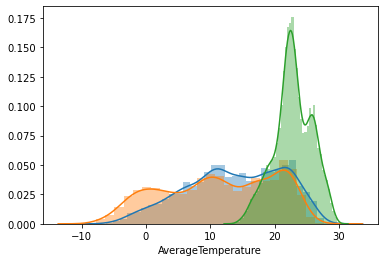

In [22]:
sns.distplot(tr_avg_temps)
sns.distplot(us_avg_temps)
sns.distplot(br_avg_temps)

In [23]:
data_selected["Country"].value_counts().index

Index(['Brazil', 'Turkey', 'United States'], dtype='object')

In [24]:
ulkeler = data_selected["Country"].unique()

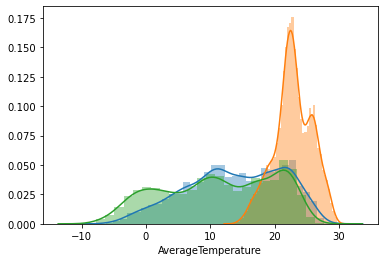

In [25]:
for ulke in ulkeler:
    sns.distplot(data_selected[data_selected["Country"]==ulke]["AverageTemperature"])


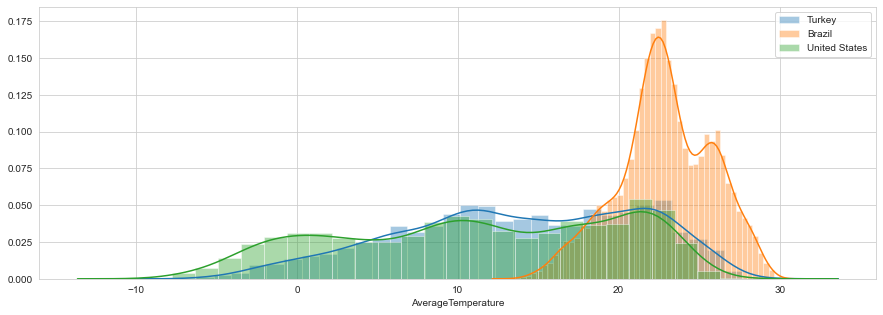

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))

for ulke in ulkeler:
    sns.distplot(data_selected[data_selected["Country"]==ulke]["AverageTemperature"])
    
plt.legend(ulkeler)

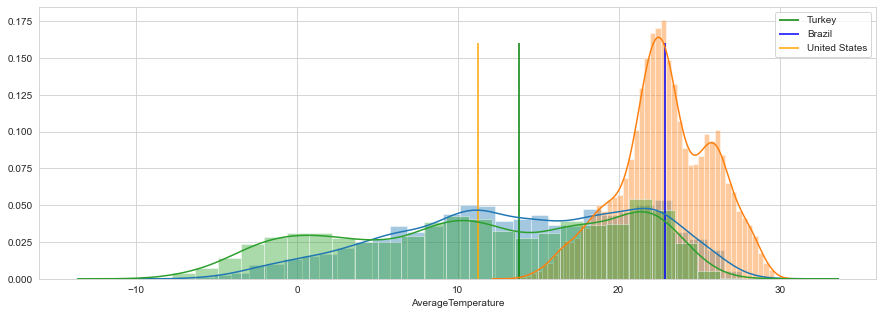

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
color= ["green","blue","orange"]

for color,ulke in zip(color,ulkeler):
    sns.distplot(data_selected[data_selected["Country"]==ulke]["AverageTemperature"])
    ulkeler_mean = data_selected[data_selected["Country"]==ulke]["AverageTemperature"].mean()
    plt.vlines(ulkeler_mean, 0, 0.16, color=color)

plt.legend(ulkeler)

<Figure size 1080x360 with 0 Axes>

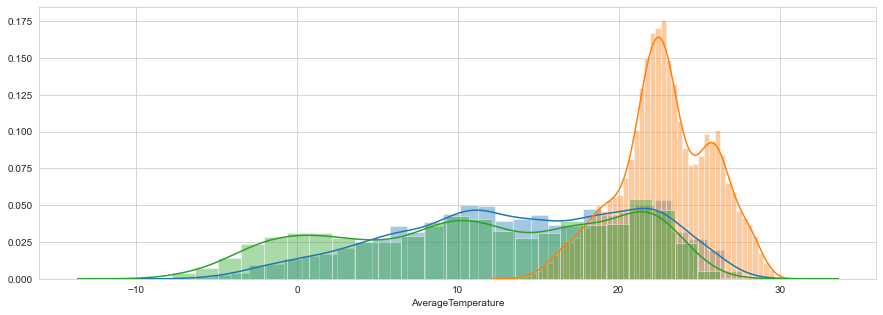

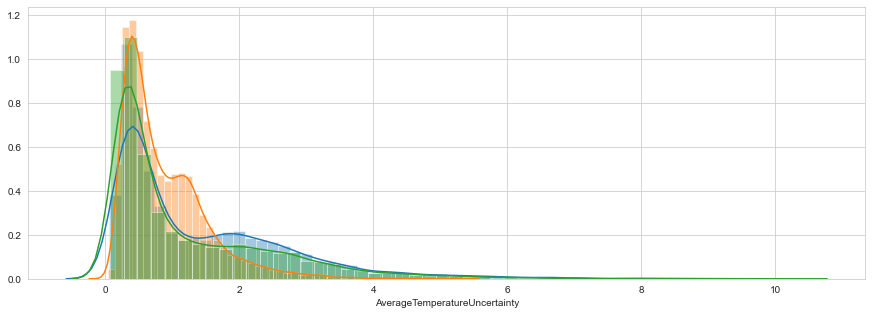

In [34]:
data_selected.columns[1:3]

kolonlar = data_selected.columns[1:3]
ulkeler = data_selected["Country"].unique()
plt.figure(figsize=(15,5))

for kolon in kolonlar:
    plt.figure(figsize=(15,5))
    for ulke in ulkeler:
        sns.distplot(data_selected[data_selected["Country"]==ulke][kolon])
    plt.show()

# scatterplot

In [36]:
data_selected.head()

dt  AverageTemperature  AverageTemperatureUncertainty    City  \
11893 1755-01-01              -3.657                          4.084  Ankara   
11894 1755-02-01              -2.453                          3.712  Ankara   
11895 1755-03-01               4.458                          3.421  Ankara   
11898 1755-06-01              21.018                          2.593  Ankara   
11899 1755-07-01              22.099                          1.963  Ankara   

      Country Latitude Longitude  
11893  Turkey   39.38N    33.29E  
11894  Turkey   39.38N    33.29E  
11895  Turkey   39.38N    33.29E  
11898  Turkey   39.38N    33.29E  
11899  Turkey   39.38N    33.29E

In [53]:
trData= data_selected[(data_selected["Country"]=="Turkey") & (data_selected["dt"] > "01.01.1900")]
trData.head()

dt  AverageTemperature  AverageTemperatureUncertainty    City  \
13634 1900-02-01               3.339                          0.733  Ankara   
13635 1900-03-01               4.060                          0.708  Ankara   
13636 1900-04-01               9.777                          0.594  Ankara   
13637 1900-05-01              14.301                          0.402  Ankara   
13638 1900-06-01              17.860                          0.509  Ankara   

      Country Latitude Longitude  
13634  Turkey   39.38N    33.29E  
13635  Turkey   39.38N    33.29E  
13636  Turkey   39.38N    33.29E  
13637  Turkey   39.38N    33.29E  
13638  Turkey   39.38N    33.29E

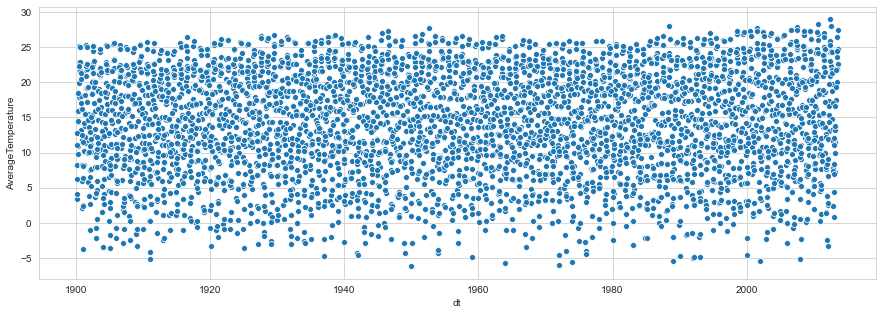

In [54]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt", y="AverageTemperature", data=trData)

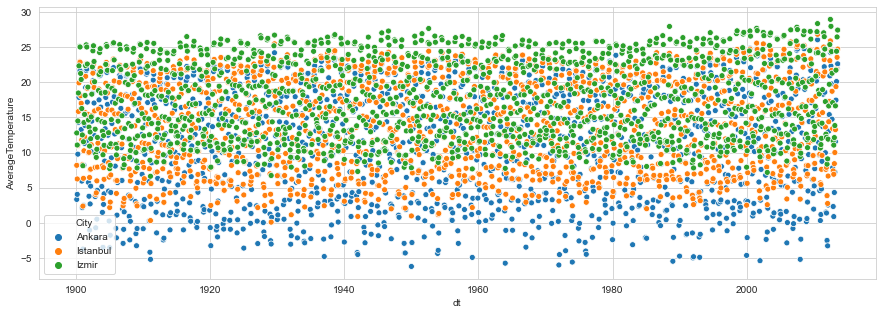

In [55]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt", y="AverageTemperature", data=trData, hue="City")


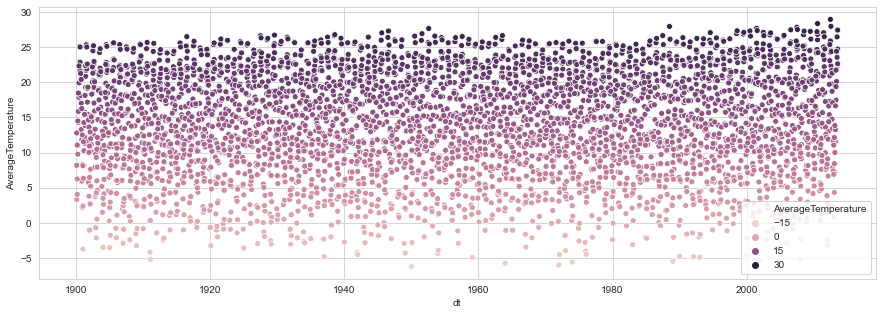

In [56]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt", y="AverageTemperature", data=trData, hue="AverageTemperature")


In [57]:
trData.head()

dt  AverageTemperature  AverageTemperatureUncertainty    City  \
13634 1900-02-01               3.339                          0.733  Ankara   
13635 1900-03-01               4.060                          0.708  Ankara   
13636 1900-04-01               9.777                          0.594  Ankara   
13637 1900-05-01              14.301                          0.402  Ankara   
13638 1900-06-01              17.860                          0.509  Ankara   

      Country Latitude Longitude  
13634  Turkey   39.38N    33.29E  
13635  Turkey   39.38N    33.29E  
13636  Turkey   39.38N    33.29E  
13637  Turkey   39.38N    33.29E  
13638  Turkey   39.38N    33.29E

In [58]:
trData_mean = trData.groupby(trData["dt"].dt.to_period("Y")).mean()
trData_mean = trData_mean.reset_index()
trData_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype        
---  ------                         --------------  -----        
 0   dt                             114 non-null    period[A-DEC]
 1   AverageTemperature             114 non-null    float64      
 2   AverageTemperatureUncertainty  114 non-null    float64      
dtypes: float64(2), period[A-DEC](1)
memory usage: 2.8 KB


In [59]:
trData_mean["dt"] = trData_mean["dt"].astype("string").astype("datetime64")

In [60]:
trData_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             114 non-null    datetime64[ns]
 1   AverageTemperature             114 non-null    float64       
 2   AverageTemperatureUncertainty  114 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.8 KB


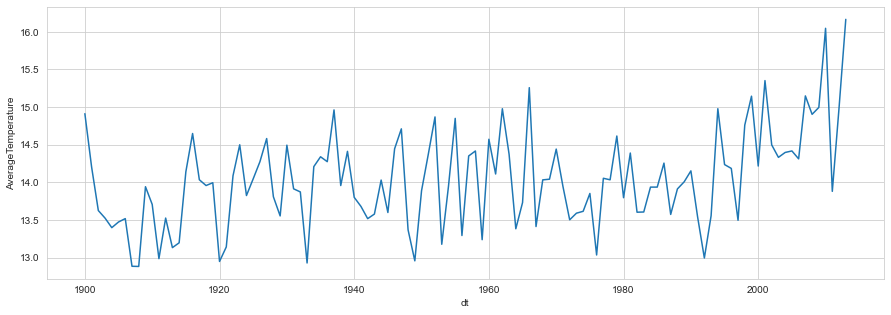

In [61]:
plt.figure(figsize=(15,5))

sns.lineplot(x="dt", y="AverageTemperature", data=trData_mean)

In [64]:
# 3 ülke için

In [74]:
data_1900 = data_selected[data_selected["dt"]> "01.01.1900"]
data_1900.head()

dt  AverageTemperature  AverageTemperatureUncertainty    City  \
13634 1900-02-01               3.339                          0.733  Ankara   
13635 1900-03-01               4.060                          0.708  Ankara   
13636 1900-04-01               9.777                          0.594  Ankara   
13637 1900-05-01              14.301                          0.402  Ankara   
13638 1900-06-01              17.860                          0.509  Ankara   

      Country Latitude Longitude  
13634  Turkey   39.38N    33.29E  
13635  Turkey   39.38N    33.29E  
13636  Turkey   39.38N    33.29E  
13637  Turkey   39.38N    33.29E  
13638  Turkey   39.38N    33.29E

In [80]:
data_means = data_1900.groupby(["Country",data_1900["dt"].dt.to_period("Y")]).mean()
data_means = data_means.reset_index()
data_means["dt"]= data_means["dt"].astype("string").astype("datetime64")
data_means.info()
data_means

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Country                        342 non-null    object        
 1   dt                             342 non-null    datetime64[ns]
 2   AverageTemperature             342 non-null    float64       
 3   AverageTemperatureUncertainty  342 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 10.8+ KB


Country         dt  AverageTemperature  \
0           Brazil 1900-01-01           22.922924   
1           Brazil 1901-01-01           22.664361   
2           Brazil 1902-01-01           23.057944   
3           Brazil 1903-01-01           22.875958   
4           Brazil 1904-01-01           22.138819   
..             ...        ...                 ...   
337  United States 2009-01-01           12.372389   
338  United States 2010-01-01           13.020167   
339  United States 2011-01-01           12.787111   
340  United States 2012-01-01           13.960778   
341  United States 2013-01-01           13.957148   

     AverageTemperatureUncertainty  
0                         1.216561  
1                         1.084764  
2                         0.891472  
3                         1.031556  
4                         1.147403  
..                             ...  
337                       0.325028  
338                       0.337444  
339                       0.355472  
340                       0.393278  
341                       0.489926  

[342 rows x 4 columns]

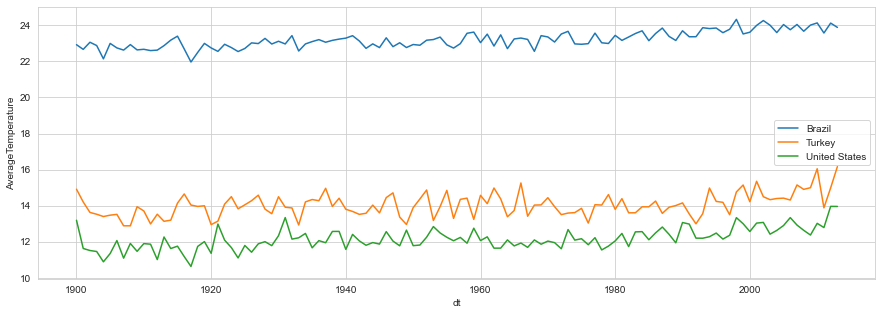

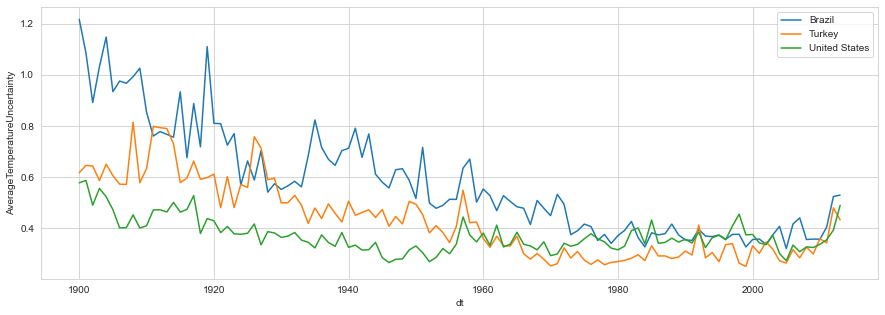

In [84]:
for col in data_means.columns[2:4]:
    plt.figure(figsize=(15,5))

    for ulke in data_means["Country"].unique():
        data=data_means[data_means["Country"]==ulke]
        sns.lineplot(x="dt", y=col, data=data)
    plt.legend(data_means["Country"].unique())